In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\kapad\\Desktop\\TweetAnalysis\\tweets_dataset.csv")

In [5]:
df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type
0,2022-10-31T08:30:28.000Z,1586999028612472834,1586999028612472834,2981738470,RT @DrKEichhorn: Heute vor 505 hat Luther sein...,9,0,0,0,"[{'type': 'retweeted', 'id': '1586978646862036...",[],retweet
1,2022-10-29T09:32:03.000Z,1586289751338127360,1586289751338127360,1132055796571877376,Toxische Umfrage - so wird Wochenendarbeit als...,6,5,110,0,"[{'type': 'quoted', 'id': '1586254670552797184'}]","['WissSystemFehler', 'IchbinHanna', 'Wissensch...",original
2,2022-10-28T08:03:27.000Z,1585905069345902593,1585905069345902593,1132055796571877376,Mein Rant über Konferenzreisekosten &amp; #Ich...,1,0,11,0,[],"['IchbinHanna', 'Mediengeschichte', 'mediahist...",original
3,2022-10-26T20:08:17.000Z,1585362702641561601,1585362702641561601,1132055796571877376,Rant über 1800 EUR verauslagte Konferenzreisek...,2,22,126,0,[],['IchbinHanna'],original
4,2022-10-25T13:11:11.000Z,1584895346874134528,1584895346874134528,1132055796571877376,Meine Auslagen für Konferenzreisen betragen mi...,11,16,139,1,[],"['Zwangsteilzeit', 'IchbinHanna']",original


In [6]:
dF=df.drop_duplicates(subset=['tweet_id'])

### To get the total number of tweets and retweets in accordance to the hashtag create a different data frame.

In [7]:
data_pie = dF['tweet_type'].value_counts().rename_axis('tweet_type').reset_index(name='tweets_count')

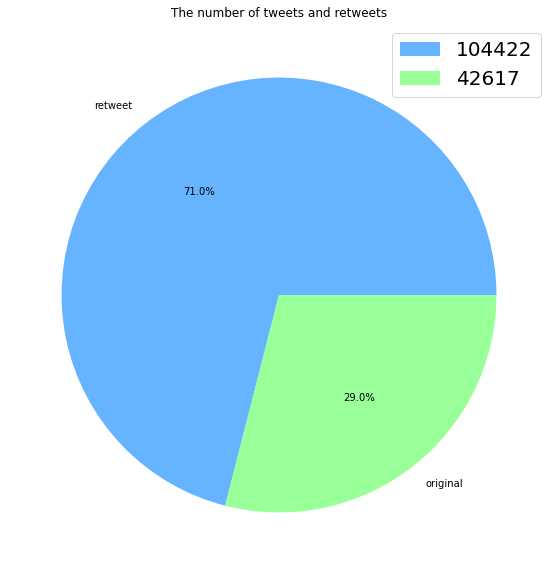

In [8]:
plt.figure(figsize=(10,10))
colors = ['#66b3ff','#99ff99','#ff9999','#ffcc99']
plt.pie(data_pie.tweets_count, labels=data_pie.tweet_type,colors=colors, autopct='%1.1f%%')
plt.title('The number of tweets and retweets')
plt.legend(data_pie.tweets_count,fontsize=20)
plt.show()

In [17]:
retweet_c = dF.loc[dF['tweet_type'] == 'original', 'retweet_count'].sum()
retweet_c

1067739

In [18]:
quote_c=dF['quote_count'].sum()
quote_c

332427

<ipython-input-19-bfc192a3e820>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000')]

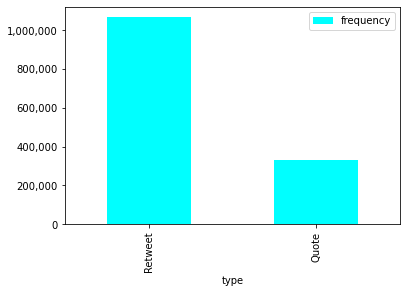

In [19]:
data = pd.DataFrame({'type':['Retweet', 'Quote'], 'frequency':[retweet_c,quote_c]})
ax= data.plot.bar(x='type', y='frequency', color = 'cyan')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])